In [73]:
# Data Extraction
import pandas as pd 
import numpy as np
risk_free_rate = pd.read_excel('./../homework/data/dfa_analysis_data.xlsx', sheet_name = 'factors')[['Date','RF']].set_index('Date')
factors = pd.read_excel('./../homework/data/dfa_analysis_data.xlsx', sheet_name = 'factors').drop(columns = ['RF']).set_index('Date')
portfolio_total_returns = pd.read_excel('./../homework/data/dfa_analysis_data.xlsx', sheet_name = 'portfolios (total returns)').set_index('Date')

portfolio_excess_returns = portfolio_total_returns.sub(risk_free_rate.values)

In [22]:
# Factor Pricing 
df = pd.read_excel("./../homework/data/factor_pricing_data.xlsx", sheet_name ='portfolios (excess returns)')
df = df.set_index('Date')
portfolios = df 
portfolios.head() 

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685


In [74]:
# extracting based on the dates 
pre_case = factors.loc[:'2014']
post_case = factors.loc['2015':]


In [131]:
def portfolio_returns_calc(data, weights_df): 
    return pd.DataFrame(data @ (weights_df.values)) 

In [75]:
annualization_factor = 12
def portfolio_metrics_basic(returns: pd.DataFrame, annualization_factor: float) -> pd.DataFrame: 
    '''
    Returns Annualized ER, Vol, SR, 
    '''
    
    returns_df = pd.DataFrame(index = returns.columns) 
    mu = returns.mean() * annualization_factor
    vol = returns.std() * np.sqrt(annualization_factor)
    sr = mu / vol

    
    returns_df['Annnualized Return'] = mu.values 
    returns_df['Annnualized Vol'] = vol.values 
    returns_df['Annnualized SR'] = sr.values
    
    return returns_df

portfolio_metrics_basic(pre_case,annualization_factor)



,Annnualized Return,Annnualized Vol,Annnualized SR
Mkt-RF,0.078484,0.187220,0.419206
SMB,0.025359,0.111318,0.227810
HML,0.047692,0.122454,0.389466


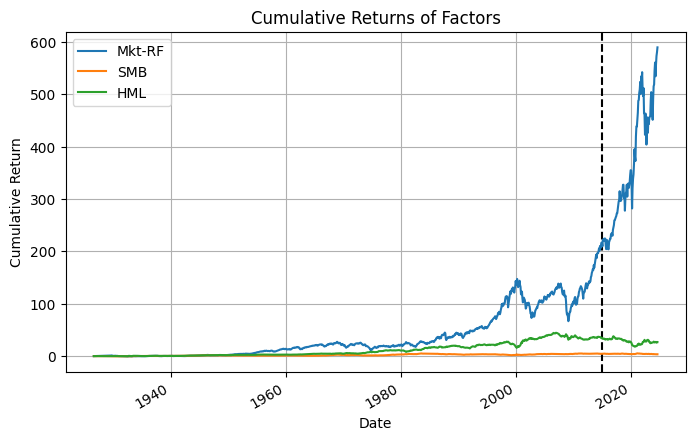

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_returns(data:pd.DataFrame, cutoff_date: None): 
    fig, ax = plt.subplots(figsize=(8, 5))
    
    if cutoff_date is not None: 
        ax.axvline(pd.to_datetime(cutoff_date), color='k', linestyle='--')

    cum_rets = (1 + data).cumprod() - 1
    cum_rets.plot(ax=ax)
    ax.set_title('Cumulative Returns of Factors')
    ax.set_ylabel('Cumulative Return')
    ax.set_xlabel('Date')
    plt.grid(True)
plot_returns(factors, '2015')

MIN Correlation pair is ('SMB', 'HML'), with a correlation of 0.1207736830392737
MAX Correlation pair is ('SMB', 'Mkt-RF'), with a correlation of 0.31470968049737796


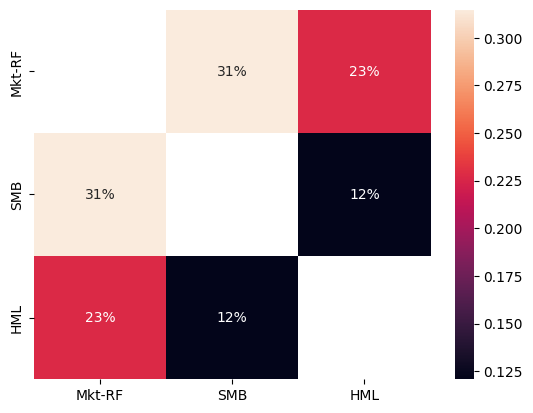

In [77]:
def plot_corr(data: pd.DataFrame):
    corr_mtx = data.corr() 
    corr_mtx[corr_mtx==1] = None
    sns.heatmap(corr_mtx,annot=True,fmt='.0%');

    corr_rank = corr_mtx.unstack().sort_values().dropna()
    pair_max = corr_rank.index[-1]
    pair_min = corr_rank.index[0]

    min_corr_value = corr_rank.iloc[0]
    max_corr_value = corr_rank.iloc[-1]
    
    print(f'MIN Correlation pair is {pair_min}, with a correlation of {min_corr_value}')
    print(f'MAX Correlation pair is {pair_max}, with a correlation of {max_corr_value}')
    
plot_corr(factors)

# Testing Models 


#### CAPM: a portfolio's expected excess return is a function of the equity market index. Any excess return is proportional to the regression beta (mean excess return of the market) 


In [78]:
portfolio_total_returns = pd.read_excel('./../homework/data/dfa_analysis_data.xlsx', sheet_name = 'portfolios (total returns)').set_index('Date')
portfolio_total_returns.head()

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.058248,-0.017006,0.004875,-0.014580,0.020534,0.012077,0.024192,0.004926,-0.026049,-0.003344,...,0.015893,0.015278,0.012978,0.002727,0.024678,0.034539,0.060902,0.020266,0.031111,0.005623
1926-08-31,-0.020206,-0.080282,0.013796,0.014606,0.083968,0.023618,-0.011849,0.040084,0.005038,0.061675,...,0.013336,0.038730,0.020021,0.021706,0.053422,0.010124,0.041903,0.020131,0.054849,0.077576
1926-09-30,-0.048291,-0.026154,-0.043417,-0.032729,0.008649,-0.026540,-0.012618,0.010829,-0.035480,-0.009401,...,0.010923,-0.005250,-0.017636,0.014646,0.008730,-0.012906,0.036538,0.000950,-0.007487,-0.024284
1926-10-31,-0.093729,-0.035519,-0.034948,0.034413,-0.025476,-0.028069,-0.032663,-0.050745,-0.080191,-0.013213,...,-0.033361,-0.026559,-0.021070,-0.031051,-0.053525,-0.027413,-0.030071,-0.022437,-0.046719,-0.058129
1926-11-30,0.055888,0.041877,0.024623,-0.044494,0.005362,0.031033,-0.023690,0.030078,0.051546,0.027292,...,0.034448,0.023887,0.037335,0.049320,0.018213,0.042946,0.025326,0.015204,0.036619,0.025636


In [79]:
metrics = portfolio_metrics_basic(portfolio_total_returns.loc['1981-01-01':], 12)
cols = list(metrics.columns)
metrics.head()

,Annnualized Return,Annnualized Vol,Annnualized SR
SMALL LoBM,0.044597,0.273002,0.163356
ME1 BM2,0.126615,0.235990,0.536529
ME1 BM3,0.129932,0.200968,0.646532
ME1 BM4,0.153924,0.193999,0.793428
SMALL HiBM,0.165764,0.209499,0.791240


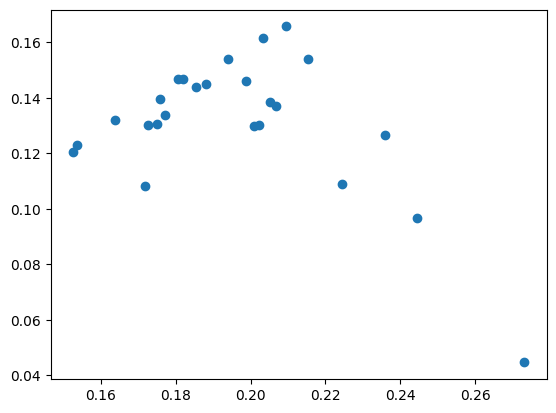

In [80]:
plt.scatter(metrics[cols[1]], metrics[cols[0]])

- If CAPM were true, same Treynor Ratio for all portfolios as the portfolios since portfolios should ideally have their expected returns / regression betas to be the same since all excess returns are compensated for by the betas.
- Alphas should also be lower (ideally 0)
- Low magnitude of residuals and ideally 0 information ratios 

In [81]:
def tangency_weights(returns,dropna=True,scale_cov=1, name = 'Tangency'):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()
    tangency_weights_df = pd.DataFrame(weights, index=returns.columns, columns=[f'{name} Weights'])

    return tangency_weights_df
tangency_weights_df = tangency_weights(portfolios)

In [117]:
annualization_factor = 12 

import statsmodels.api as sm
def time_series_regression(portfolio, factors, annualization_factor, FF3F = False, resid = False):
    
    ff_report = pd.DataFrame(index=portfolio.columns)
    bm_residuals = pd.DataFrame(columns=portfolio.columns)

    rhs = sm.add_constant(factors)

    for portf in portfolio.columns:
        lhs = portfolio[portf]
        res = sm.OLS(lhs, rhs, missing='drop').fit()
        ff_report.loc[portf, 'alpha_hat'] = res.params['const'] * annualization_factor
        ff_report.loc[portf, 'beta_mkt'] = res.params[1]
        if FF3F:
            ff_report.loc[portf, 'Size beta'] = res.params[2] 
            ff_report.loc[portf, 'Value beta'] = res.params[3]
            
        ff_report.loc[portf, 'info_ratio'] = np.sqrt(annualization_factor) * res.params['const'] / res.resid.std()
        ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]
        ff_report.loc[portf, 'R-squared'] = res.rsquared
        ff_report.loc[portf, 'Tracking Error'] = (res.resid.std()*np.sqrt(annualization_factor))

        if resid:
            bm_residuals[portf] = res.resid
            
            
        
    if resid:
        return bm_residuals
        
    return ff_report

CAPM: returns regressed against the mkt portfolio

In [105]:
metrics = time_series_regression(portfolio_excess_returns.loc['1981':], factors.loc['1981':,'Mkt-RF'], annualization_factor)

/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta_mkt'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

In [112]:
metrics.head()

,alpha_hat,beta_mkt,info_ratio,treynor_ratio,R-squared,Tracking Error
SMALL LoBM,-0.106730,1.356365,-0.613409,0.004918,0.596078,0.173994
ME1 BM2,-0.008774,1.165744,-0.057999,0.076080,0.590508,0.151278
ME1 BM3,0.004620,1.045218,0.039081,0.088026,0.655026,0.118204
ME1 BM4,0.034696,0.972450,0.285425,0.119285,0.608481,0.121558
SMALL HiBM,0.044652,0.994979,0.315148,0.128483,0.544955,0.141685


#### Cross Sectional Estimation

Expected portfolio return = vector of alphas + vector of betas and regression + vector of errors
- regressed for the expected excess returns against the market betas

In [98]:
time_series_regression(portfolio_excess_returns.loc['1981':].mean().to_frame('Mean Portfolio excess returns'), metrics['beta'])

/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/948960688.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/948960688.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]


,alpha,beta,info_ratio,treynor_ratio,R-squared,Tracking Error,MAE
Mean Portfolio excess returns,0.208623,-0.009015,35.404667,-10.4114,0.300557,0.005893,0.001227


If CAPM were true, low alpha, high beta and high R-squared. since all market betas should be explaining the same factor, expected to be heavily correlated

Low R squared and betas and higher alpha: indicate other risk factors that can explain excess returns of equity portfolios. add size and value portfolios containing premia unlreated to the CAPM

#### Cross Sectional Estimation: FF3 Model (adding more factors)

In [118]:
factors.head()

,Mkt-RF,SMB,HML
Date,,,
1926-07-31,0.0296,-0.0256,-0.0243
1926-08-31,0.0264,-0.0117,0.0382
1926-09-30,0.0036,-0.0140,0.0013
1926-10-31,-0.0324,-0.0009,0.0070
1926-11-30,0.0253,-0.0010,-0.0051


In [120]:
ff3_metrics = time_series_regression(portfolio_excess_returns.loc['1981':], factors.loc['1981':,:], annualization_factor, FF3F =True)


/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta_mkt'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'Size beta'] = res.params[2]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acc

In [121]:
ff3_metrics.head()

,alpha_hat,beta_mkt,Size beta,Value beta,info_ratio,treynor_ratio,R-squared,Tracking Error
SMALL LoBM,-0.085811,1.111846,1.392517,-0.253788,-0.937530,0.006000,0.888226,0.091529
ME1 BM2,0.001435,0.965456,1.317675,-0.014432,0.020344,0.091863,0.910924,0.070556
ME1 BM3,0.000595,0.923142,1.065113,0.277445,0.011988,0.099666,0.939265,0.049597
ME1 BM4,0.022184,0.877818,1.065753,0.477399,0.467283,0.132144,0.940281,0.047474
SMALL HiBM,0.023053,0.929787,1.066006,0.691417,0.312014,0.137492,0.876254,0.073886


Since we are using FF3 model, regressing against the betas of the 3 factors. 

In [126]:
time_series_regression(portfolio_excess_returns.loc['1981':].mean().to_frame('Mean Portfolio excess returns'), ff3_metrics[['beta_mkt', 'Size beta', 'Value beta']], annualization_factor)


/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta_mkt'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]


,alpha_hat,beta_mkt,info_ratio,treynor_ratio,R-squared,Tracking Error
Mean Portfolio excess returns,0.186491,-0.008349,36.112277,-11.24266,0.462776,0.005164


#### Using Portfolio Opt to create a new factor

In [136]:
portfolio_excess_returns.loc['1981':].mean()

SMALL LoBM    0.000556
ME1 BM2       0.007391
ME1 BM3       0.007667
ME1 BM4       0.009667
SMALL HiBM    0.010653
ME2 BM1       0.004906
ME2 BM2       0.008376
ME2 BM3       0.008829
ME2 BM4       0.009070
ME2 BM5       0.009666
ME3 BM1       0.005916
ME3 BM2       0.008930
ME3 BM3       0.007695
ME3 BM4       0.009063
ME3 BM5       0.010321
ME4 BM1       0.007696
ME4 BM2       0.007998
ME4 BM3       0.007724
ME4 BM4       0.008474
ME4 BM5       0.009018
BIG LoBM      0.007828
ME5 BM2       0.007103
ME5 BM3       0.006875
ME5 BM4       0.005852
BIG HiBM      0.008274
dtype: float64

In [138]:
w_t = tangency_weights(portfolio_excess_returns['1981':])
portfolio_returns = portfolio_returns_calc(portfolio_excess_returns.loc['1981':], w_t)
portfolio_returns.columns = ['tangency_weights']
tangency_capm = time_series_regression(portfolio_excess_returns.loc['1981':], portfolio_returns, annualization_factor)

/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta_mkt'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated a

In [140]:
tangency_capm.head()

,alpha_hat,beta_mkt,info_ratio,treynor_ratio,R-squared,Tracking Error
SMALL LoBM,8.795048e-16,0.017416,3.212842e-15,0.383026,0.000174,0.273747
ME1 BM2,5.672546e-16,0.231549,2.450664e-15,0.383026,0.041297,0.231470
ME1 BM3,4.163336e-16,0.240209,2.135230e-15,0.383026,0.061325,0.194983
ME1 BM4,7.389922e-16,0.302847,4.020022e-15,0.383026,0.104610,0.183828
SMALL HiBM,5.490400e-16,0.333758,2.768825e-15,0.383026,0.108695,0.198293


In [142]:
portfolio = portfolio_excess_returns.loc['1981':].mean().to_frame('Mean Portfolio excess returns')
time_series_regression(portfolio, tangency_capm.loc[:,['beta_mkt']], False)

/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'beta_mkt'] = res.params[1]
/var/folders/qq/h84pzsw93xbd60q11ssc5v640000gn/T/ipykernel_1582/2576739127.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ff_report.loc[portf, 'treynor_ratio'] = annualization_factor * portfolio[portf].mean() / res.params[1]


,alpha_hat,beta_mkt,info_ratio,treynor_ratio,R-squared,Tracking Error
Mean Portfolio excess returns,0.0,0.031919,0.0,0.0,1.0,0.0
